In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)


In [111]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [112]:
print(df.shape)
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [113]:
df.dtypes
# area code needs to be a string because they are not meant to be used in arithmetic, for ohe later
# churn needs to be converted to an integer, 1 if true 0 if flase
# voice mail plan needs to be converted to a 1 or 0
# phone number is going to be unique, will have to drop

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [114]:
df['area code'] = df['area code'].astype(str, errors = 'ignore')

df['voice mail plan'] = np.where( df['voice mail plan']== 'yes', '1', '0')
df['international plan'] = np.where( df['international plan']== 'yes', '1', '0')


df['churn'] = df['churn'].astype(str, errors = 'ignore')
df['churn'] = np.where( df['churn']== 'True', '1', '0')

df = df.drop(['phone number'], axis=1)

In [115]:
df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [116]:
df.dtypes

state                      object
account length              int64
area code                  object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                      object
dtype: object

In [117]:
df.describe(include = 'all')

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,415,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,106,NaN,1655,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [133]:
df[df['total day minutes'].eq(0)]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day_price,eve_price,night_price,int_price,total_call,roaming
1345,SD,98,415,0,0,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1,NaN,0.085025,0.045003,0.270588,219,0
1397,VT,101,510,0,0,0,0.0,0,0.0,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0,NaN,0.085008,0.045024,0.269444,218,0


In [134]:
df[df['total eve minutes'].eq(0)]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day_price,eve_price,night_price,int_price,total_call,roaming
2932,UT,97,415,0,0,0,209.2,134,35.56,0.0,0,0.0,175.4,94,7.89,11.8,6,3.19,1,0,0.169981,NaN,0.044983,0.270339,234,0


In [135]:
df[df['total night minutes'].eq(0)]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day_price,eve_price,night_price,int_price,total_call,roaming


In [136]:
df[df['total intl minutes'].eq(0)]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day_price,eve_price,night_price,int_price,total_call,roaming
179,KS,70,408,0,0,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.0,3,0,0.170013,0.085015,0.044980,NaN,346,0
343,IN,98,408,0,1,21,64.6,98,10.98,176.1,86,14.97,244.8,84,11.02,0.0,0,0.0,2,0,0.169969,0.085009,0.045016,NaN,268,0
488,VT,165,510,0,0,0,242.9,126,41.29,209.8,65,17.83,228.4,126,10.28,0.0,0,0.0,1,0,0.169988,0.084986,0.045009,NaN,317,0
595,HI,87,408,0,1,28,151.4,95,25.74,152.4,97,12.95,250.1,109,11.25,0.0,0,0.0,1,0,0.170013,0.084974,0.044982,NaN,301,0
712,MO,106,415,0,0,0,114.4,104,19.45,78.3,101,6.66,232.7,78,10.47,0.0,0,0.0,2,0,0.170017,0.085057,0.044994,NaN,283,0
878,WI,62,415,0,0,0,281.0,66,47.77,160.6,108,13.65,77.9,74,3.51,0.0,0,0.0,1,0,0.170000,0.084994,0.045058,NaN,248,0
1028,KS,70,415,0,0,0,222.8,114,37.88,215.9,113,18.35,223.5,122,10.06,0.0,0,0.0,1,0,0.170018,0.084993,0.045011,NaN,349,0
1080,OH,114,415,0,0,0,191.5,88,32.56,175.2,78,14.89,220.3,118,9.91,0.0,0,0.0,0,0,0.170026,0.084989,0.044984,NaN,284,0
1400,VA,115,415,0,0,0,132.0,90,22.44,197.5,75,16.79,175.8,114,7.91,0.0,0,0.0,3,0,0.170000,0.085013,0.044994,NaN,279,0
1564,VT,137,510,0,0,0,97.5,95,16.58,195.8,82,16.64,288.8,78,13.00,0.0,0,0.0,1,0,0.170051,0.084985,0.045014,NaN,255,0


In [118]:
cat_lst = ['area code','international plan', 'voice mail plan', 'churn','state']
con_lst = [x for x in df.columns.values if x not in cat_lst]

for x in cat_lst:
    print(df[x].value_counts(normalize = True))
    print('\n')
    

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64


0    0.90309
1    0.09691
Name: international plan, dtype: float64


0    0.723372
1    0.276628
Name: voice mail plan, dtype: float64


0    0.855086
1    0.144914
Name: churn, dtype: float64


WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
VT    0.021902
ID    0.021902
MI    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NJ    0.020402
NC    0.020402
MT    0.020402
CO    0.019802
WA    0.019802
NV    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
ND    0.018602
ME    0.018602
NM    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA 

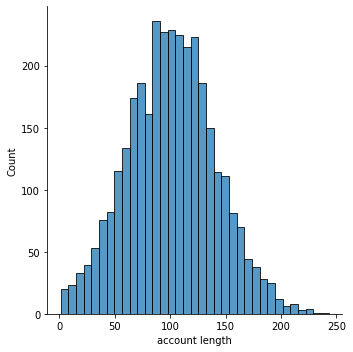

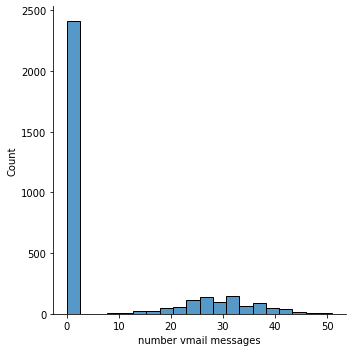

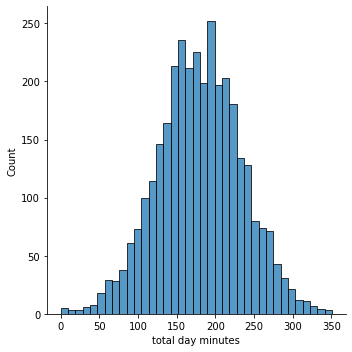

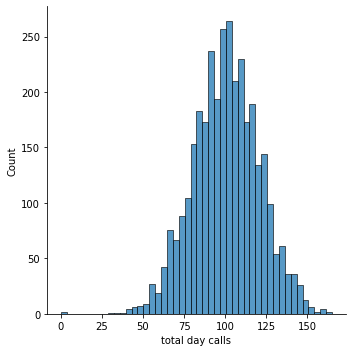

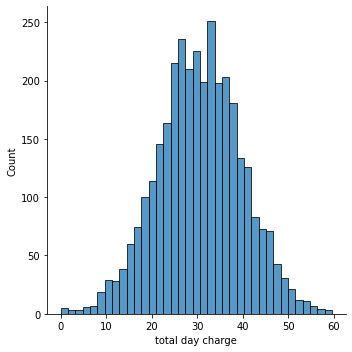

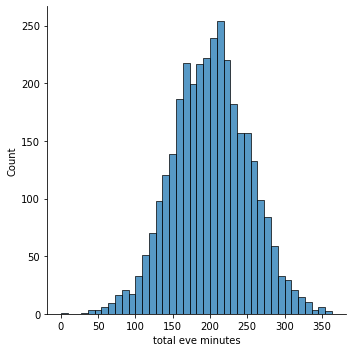

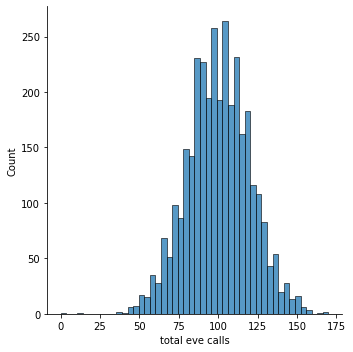

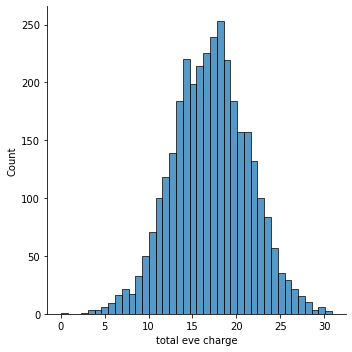

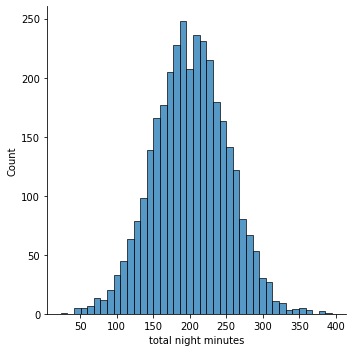

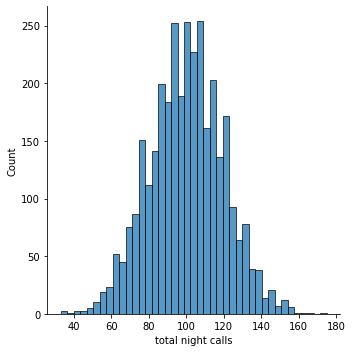

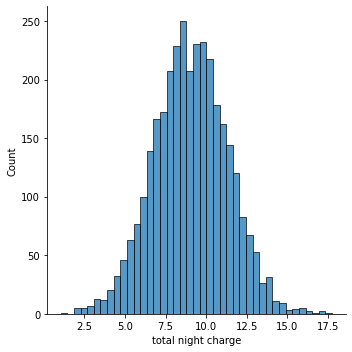

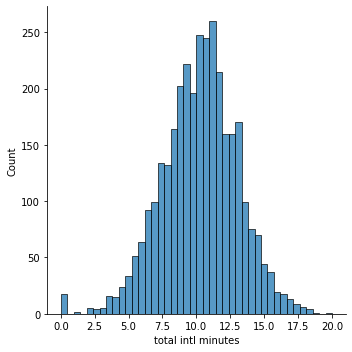

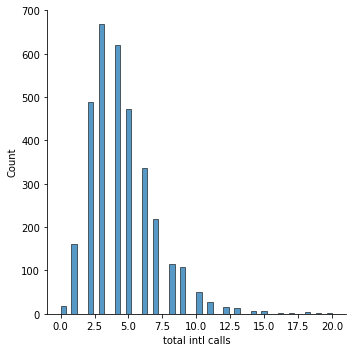

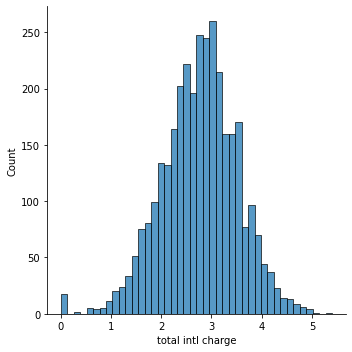

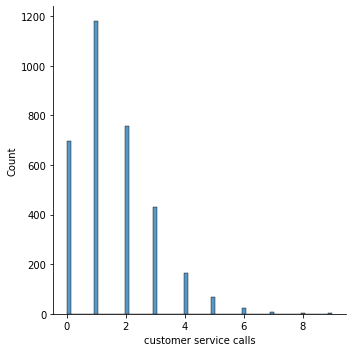

In [121]:
# run a quick for loop to look at the distributions for the continuous or semi-continuous columns
for x in con_lst:
    sb.displot(df[x])

# Feature Engineering
First step is to see what the customers are being charged per minute for the different times of day

In [130]:
df['day_price'] = df['total day charge'] / df['total day minutes']
df['eve_price'] = df['total eve charge'] / df['total eve minutes']
df['night_price'] = df['total night charge'] / df['total night minutes']
df['int_price'] = df['total intl charge'] / df['total intl minutes']

df['total_call'] = (df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'])

df['roaming'] = np.where( (df['international plan'] == 0 ) & (df['total intl calls'] > 0)   ,'1','0' )


new_lst = ['roaming','total_call','int_price','night_price','eve_price','day_price']

df[new_lst].describe(include= 'all')

,roaming,total_call,int_price,night_price,eve_price,day_price
count,3333,3333.000000,3315.000000,3333.000000,3332.000000,3331.000000
unique,1,NaN,NaN,NaN,NaN,NaN
top,0,NaN,NaN,NaN,NaN,NaN
freq,3333,NaN,NaN,NaN,NaN,NaN
mean,NaN,305.137114,0.270057,0.045000,0.085001,0.170003
std,NaN,34.448164,0.000329,0.000017,0.000016,0.000028
min,NaN,191.000000,0.268182,0.044828,0.084936,0.169231
25%,NaN,282.000000,0.269811,0.044988,0.084988,0.169989
50%,NaN,305.000000,0.270000,0.045000,0.085000,0.170004
75%,NaN,328.000000,0.270297,0.045013,0.085013,0.170017


In [131]:
df.roaming.value_counts()

0    3333
Name: roaming, dtype: int64

In [132]:
df.isna().sum()

state                      0
account length             0
area code                  0
international plan         0
voice mail plan            0
number vmail messages      0
total day minutes          0
total day calls            0
total day charge           0
total eve minutes          0
total eve calls            0
total eve charge           0
total night minutes        0
total night calls          0
total night charge         0
total intl minutes         0
total intl calls           0
total intl charge          0
customer service calls     0
churn                      0
day_price                  2
eve_price                  1
night_price                0
int_price                 18
total_call                 0
roaming                    0
dtype: int64

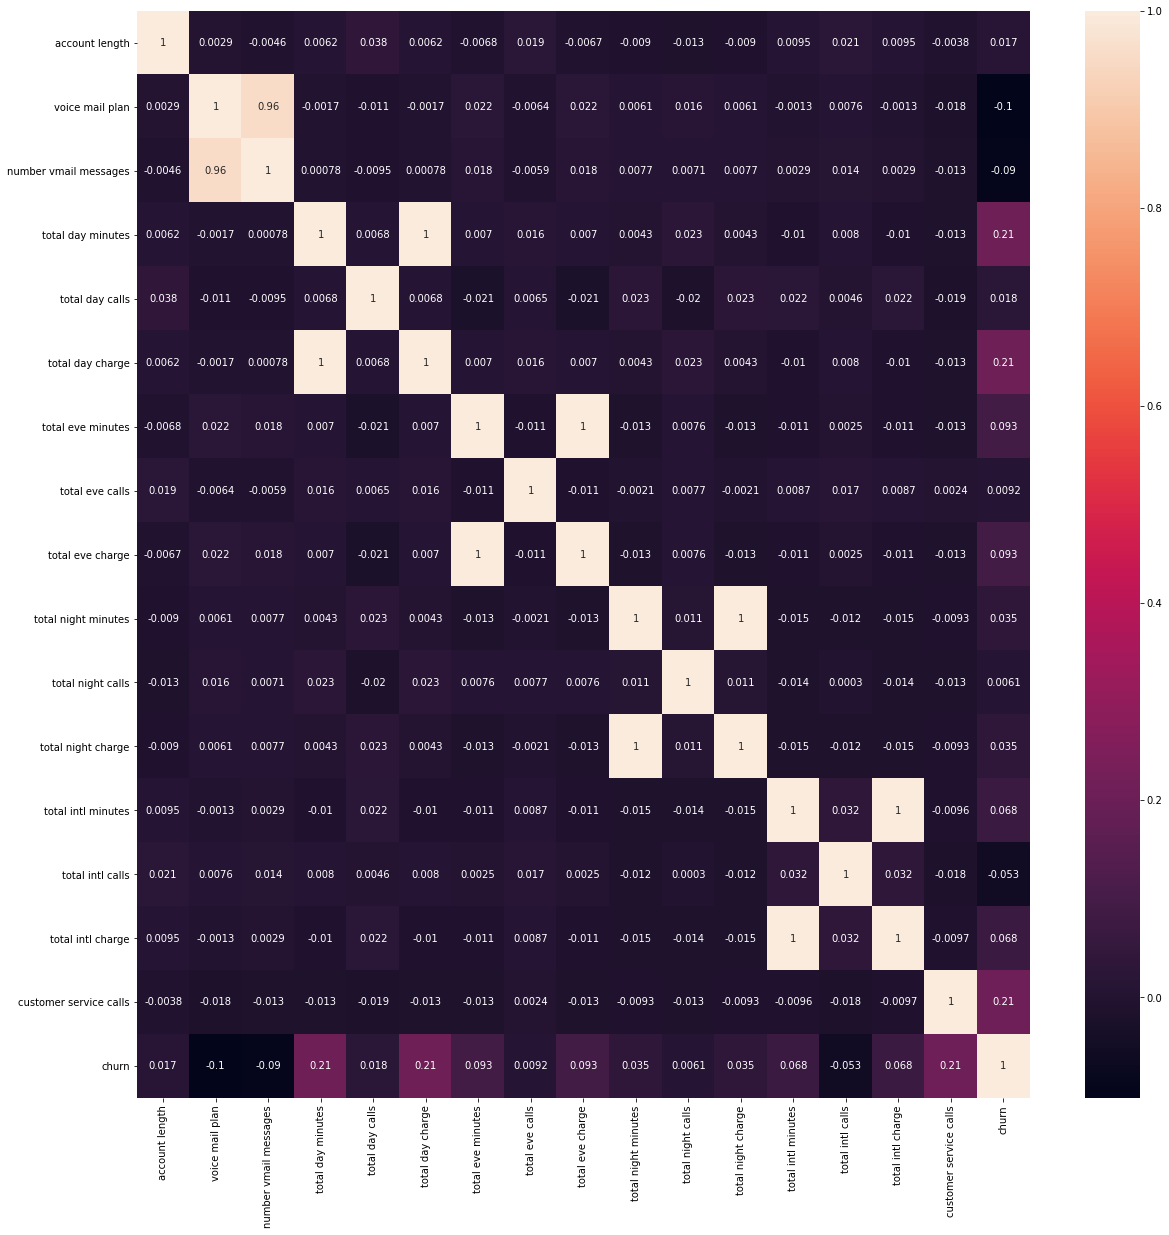

In [75]:
corr = df.corr()
fig,ax = plt.subplots(figsize = (20,20))
sb.heatmap(corr,annot = True)
plt.show()

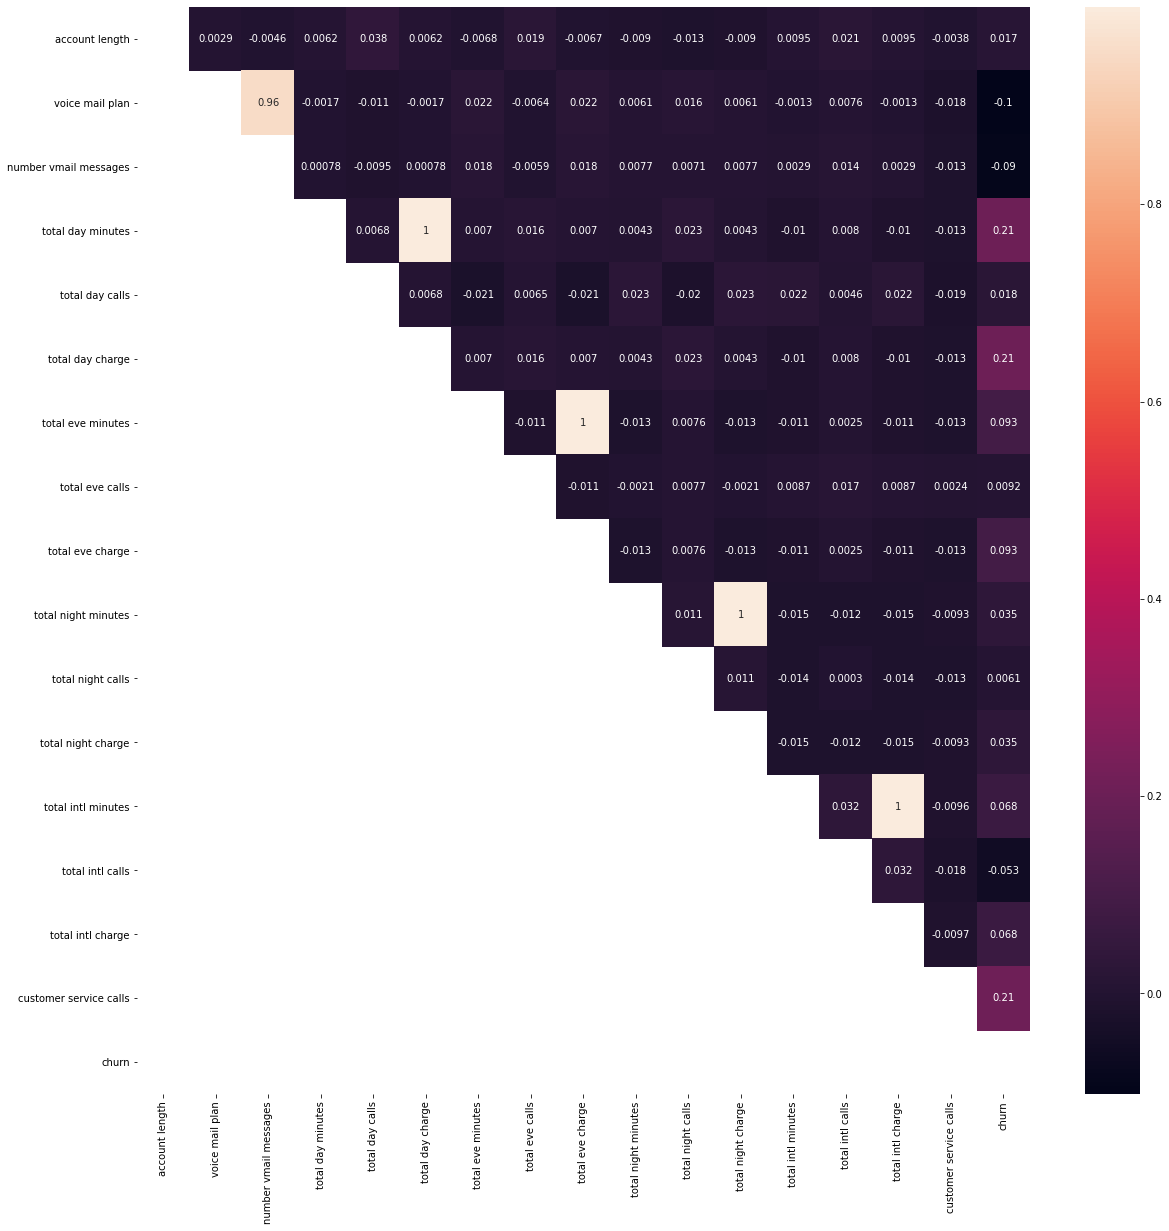

In [76]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
fig,ax = plt.subplots(figsize = (20,20))
sb.heatmap(upper_tri,annot = True)
plt.show()

In [77]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] 
print(to_drop)

['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']


In [78]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [82]:
features = [x for x in df.columns.values if x not in to_drop]


df1 = df[features]
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,1,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,371-7191,no,1,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,358-1921,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,375-9999,yes,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,330-6626,yes,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [83]:
df.describe(include= 'all')

,state,account length,area code,phone number,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
count,3333,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,3,3333,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,415,355-9508,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,1655,1,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,NaN,NaN,NaN,0.276628,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,NaN
std,NaN,39.822106,NaN,NaN,NaN,0.447398,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,NaN
50%,NaN,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,1.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,NaN


In [86]:
cat_lst = ['area code','international plan', 'voice mail plan', 'churn','state']
con_lst = [x for x in df.columns.values if x not in cat_lst]

for x in cat_lst:
    print(df[x].value_counts(normalize = True))
    print('\n')
    


415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64


no     0.90309
yes    0.09691
Name: international plan, dtype: float64


0    0.723372
1    0.276628
Name: voice mail plan, dtype: float64


False    0.855086
True     0.144914
Name: churn, dtype: float64


WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
WI    0.023402
OH    0.023402
OR    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
VT    0.021902
ID    0.021902
MI    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NJ    0.020402
NC    0.020402
MT    0.020402
CO    0.019802
WA    0.019802
NV    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
ND    0.018602
ME    0.018602
NM    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    

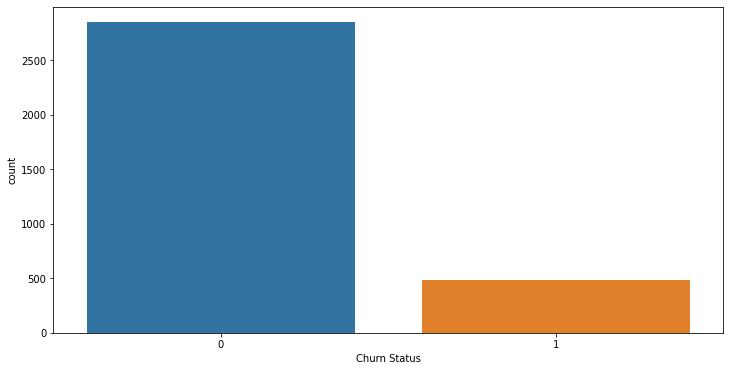

In [88]:
fig, ax = plt.subplots(figsize = (12,6))
sb.countplot(x = df.churn)
plt.xlabel('Churn Status')
fig.patch.set_visible(False)
plt.show()

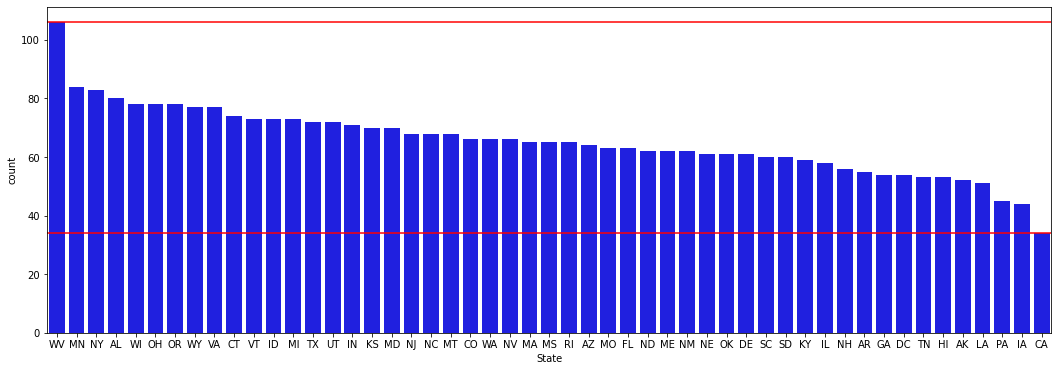

In [89]:
fig, ax = plt.subplots(figsize = (18,6))
sb.countplot(x = df.state, color = 'b',order = df['state'].value_counts().index)
plt.xlabel('State')
plt.axhline(y=max(df['state'].value_counts()), color='r', linestyle='-')
plt.axhline(y=min(df['state'].value_counts()), color='r', linestyle='-')

#fig.patch.set_visible(False)
plt.show()

In [90]:
churn_states_df = df.groupby(['state'])['churn'].value_counts()
churn_states_df

state  churn
AK     0        49
       1         3
AL     0        72
       1         8
AR     0        44
                ..
WI     1         7
WV     0        96
       1        10
WY     0        68
       1         9
Name: churn, Length: 102, dtype: int64

In [91]:
df.state.unique() # all 50 states plus DC

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)